In [148]:
print('Welcome to Decision Tree')

Welcome to Decision Tree


In [149]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [150]:
# Loan dataset
data = {
    "Age":    [25, 40, 30, 50, 35, 28, 45],
    "Income": [25, 80, 50, 40, 100, 35, 60],
    "CreditHistory": ["Bad", "Good", "Good", "Bad", "Good", "Good", "Bad"],
    "LoanApproved":  ["No", "Yes", "Yes", "No", "Yes", "Yes", "No"]
}

In [151]:
df = pd.DataFrame(data)

In [152]:
df.head(10)

,Age,Income,CreditHistory,LoanApproved
0,25,25,Bad,No
1,40,80,Good,Yes
2,30,50,Good,Yes
3,50,40,Bad,No
4,35,100,Good,Yes
5,28,35,Good,Yes
6,45,60,Bad,No


In [153]:
df["CreditHistory"] = df["CreditHistory"].map({"Bad":0, "Good":1})
df["LoanApproved"] = df["LoanApproved"].map({"No":0, "Yes":1})

In [154]:
df

,Age,Income,CreditHistory,LoanApproved
0,25,25,0,0
1,40,80,1,1
2,30,50,1,1
3,50,40,0,0
4,35,100,1,1
5,28,35,1,1
6,45,60,0,0


In [155]:
X = df[["Age","Income","CreditHistory"]]
y = df[["LoanApproved"]]

In [156]:
X

,Age,Income,CreditHistory
0,25,25,0
1,40,80,1
2,30,50,1
3,50,40,0
4,35,100,1
5,28,35,1
6,45,60,0


In [157]:
y

,LoanApproved
0,0
1,1
2,1
3,0
4,1
5,1
6,0


In [158]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [159]:
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [160]:
# Test predictions
print(clf.predict([[30, 70, 1]]))  # Age=30, Income=70k, Good history → likely Yes
print(clf.predict([[50, 40, 0]]))  # Age=50, Income=40k, Bad history → likely No

[1]
[0]


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [161]:
data = pd.read_csv("./data/loan_dataset_500.csv")

In [162]:
data.head()

,Age,Income,CreditHistory,LoanApproved
0,58,114000,Good,Yes
1,48,71000,Good,Yes
2,34,102000,Bad,Yes
3,27,35000,Bad,No
4,40,88000,Good,Yes


In [163]:
data.isnull().sum()

Age              0
Income           0
CreditHistory    0
LoanApproved     0
dtype: int64

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            500 non-null    int64 
 1   Income         500 non-null    int64 
 2   CreditHistory  500 non-null    object
 3   LoanApproved   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [165]:
data.shape

(500, 4)

In [166]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [167]:
le = LabelEncoder()
data["LoanApproved"] = le.fit_transform(data["LoanApproved"])
data["CreditHistory"] = le.fit_transform(data["CreditHistory"])

In [168]:
data.head()

,Age,Income,CreditHistory,LoanApproved
0,58,114000,1,1
1,48,71000,1,1
2,34,102000,0,1
3,27,35000,0,0
4,40,88000,1,1


In [169]:
feature_names = ["Age","Income","CreditHistory"]
target = ["LoanApproved"]

In [170]:
X = data[feature_names]
y = data[target]

In [171]:
scaler = StandardScaler()

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [173]:
X_train.head()

,Age,Income,CreditHistory
199,28,20000,1
450,36,25000,0
231,31,94000,0
95,28,40000,0
54,25,23000,0


In [174]:
y_test.shape

(100, 1)

In [184]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [185]:
X_scaled_train

array([[-1.0434462 , -1.59632587,  0.85096294],
       [-0.35879829, -1.42708013, -1.1751393 ],
       [-0.78670323,  0.90851116, -1.1751393 ],
       ...,
       [ 1.60956444,  1.11160606, -1.1751393 ],
       [ 1.60956444,  1.68704159, -1.1751393 ],
       [-0.70112225, -0.78394629,  0.85096294]], shape=(400, 3))

In [188]:
X_scaled_test

array([[-1.64251312, -1.15628693,  0.85096294],
       [-0.44437928,  1.01005861,  0.85096294],
       [ 0.4114306 ,  1.72089074,  0.85096294],
       [ 0.83933554, -1.42708013, -1.1751393 ],
       [ 1.01049752, -0.07311416,  0.85096294],
       [ 1.52398345,  0.40077393,  0.85096294],
       [ 1.52398345,  1.72089074,  0.85096294],
       [ 0.24026862, -0.75009715, -1.1751393 ],
       [ 1.01049752,  1.21315351,  0.85096294],
       [ 1.26724048,  1.4839467 ,  0.85096294],
       [ 1.43840246,  0.90851116, -1.1751393 ],
       [-0.61554126,  0.70541627,  0.85096294],
       [-1.0434462 , -0.07311416,  0.85096294],
       [ 0.06910665,  1.07775691, -1.1751393 ],
       [ 0.06910665, -0.88549374, -1.1751393 ],
       [ 1.26724048,  0.16382988,  0.85096294],
       [-1.7280941 , -1.42708013, -1.1751393 ],
       [ 1.35282147,  0.90851116,  0.85096294],
       [-0.44437928, -0.75009715,  0.85096294],
       [ 0.24026862,  1.04390776,  0.85096294],
       [ 0.58259258,  0.43462308,  0.850

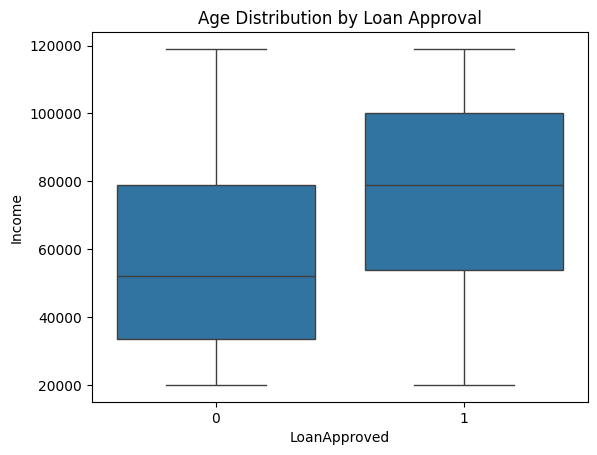

In [189]:
sns.boxplot(data=data, x="LoanApproved", y="Income")
plt.title("Age Distribution by Loan Approval")
plt.show()

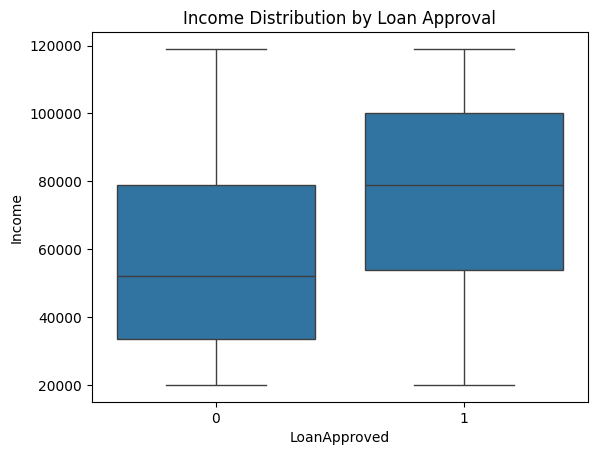

In [190]:
sns.boxplot(data=data, x="LoanApproved", y="Income")
plt.title("Income Distribution by Loan Approval")
plt.show()

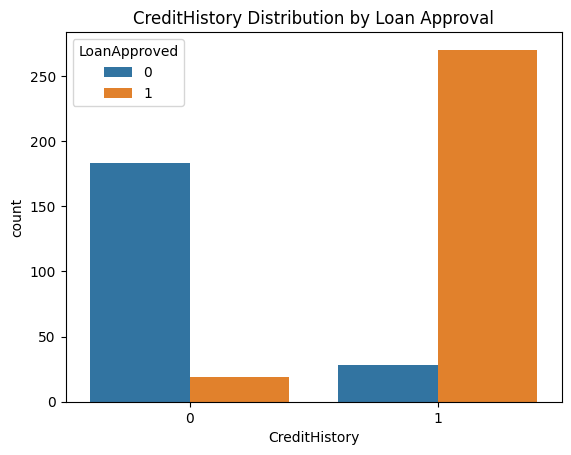

In [191]:
sns.countplot(data=data, x="CreditHistory", hue="LoanApproved")
plt.title("CreditHistory Distribution by Loan Approval")
plt.show()

In [192]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=123)

In [193]:
clf.fit(X_scaled_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [195]:
y_pred = clf.predict(X_scaled_test)

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

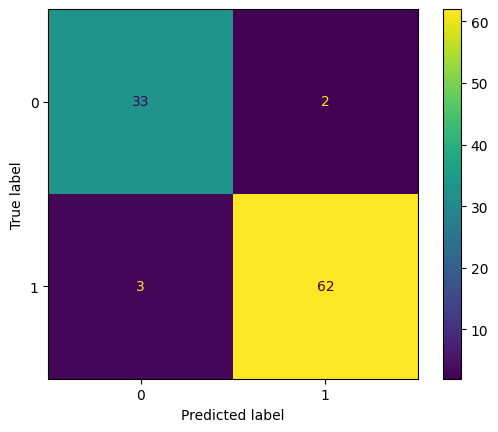

In [202]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [204]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95
